# PART 1 - Pivoting for Fun and Profit

In this exercise, we're going to continue working with data about condemned buildings in St. Louis.  This data set is in `/data/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [13]:
%matplotlib inline
import pandas as pd
#import re

data = pd.read_csv('/data/condemn.txt', low_memory=False)
data['InspectDate']=data['InspectDate'].str.extract(r'(^\d{4})')
condemnations=data[(data['InspectDate']>='1986') & (data['InspectDate']<='2014')] 
condemnations['InspectDate']

#data = data.dropna(subset=['InspectDate'])

0        1986
1        2009
2        2003
3        1996
4        2006
         ... 
32575    2013
32576    2013
32581    2014
32582    2013
32585    2013
Name: InspectDate, Length: 30232, dtype: object

In [14]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [15]:
import numpy as np

by_year = condemnations.pivot_table(
    values='AcctNum', 
    index='InspectDate', 
    columns='Status', 
    aggfunc=np.ma.count, 
    fill_value=0)

In [16]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

In [17]:
by_year

Status,B,L,R,W
InspectDate,,,,
1986,22,12,19,112
1987,91,20,8,361
1988,215,16,15,297
1989,277,15,11,432
1990,119,29,8,322
1991,139,18,4,351
1992,204,30,4,258
1993,185,47,2,193
1994,208,94,5,293


## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


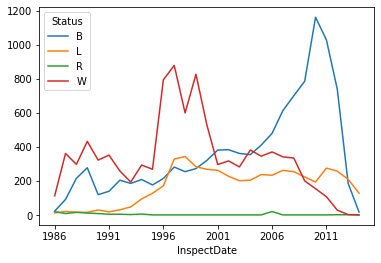

In [18]:
%matplotlib inline
by_year.plot()

Type W seems to be popular during 1996 to 1999. Type B trend always increasing since the start. Type L start getting popular around 1996 and the number gets stable at around 250. No one seems to interest in type R. In the most present year, every type except L got decreased to almost 0 but L still have some left.

---

# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage has change for my company over the past couple of months.  This real data.  Please don't judge anyone based on the information here.  ;)

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [19]:
import pandas as pd
meetings = pd.read_csv('/data/meetings.csv')
meetings['startDate']=meetings['startTime'].str[0:10]
meetings['stat']='ELSE'
criteria_bef=(meetings['startDate'] >= '2020-02-17') & (meetings['startDate'] <= '2020-02-28')
meetings['stat'][criteria_bef]='BEFORE'
criteria_dur=(meetings['startDate'] >= '2020-03-16') & (meetings['startDate'] <= '2020-03-27')
meetings['stat'][criteria_dur]='DURING'
meetings=meetings[meetings['stat'] != 'ELSE']
summary=meetings.pivot_table(index='userName', columns='stat', values='user_id',aggfunc=len, fill_value=0)
summary['pctChange']=(summary['DURING']-summary['BEFORE'])/summary['BEFORE']
summary

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


stat,BEFORE,DURING,pctChange
userName,,,
Drew.Marco,12,19,0.583333
amit.bhagat,17,30,0.764706
andrea.bryant.amitechsolutions,5,3,-0.400000
angie.warren,5,9,0.800000
chris.rogers.amitechsolutions,4,3,-0.250000
eric.keeney,15,27,0.800000
eric.rodman,4,12,2.000000
jeff.hatfield.amitechsolutions,13,26,1.000000
jennifer.patton.amitechs,5,7,0.400000


---

In [20]:
assert(len(summary) == 22)

In [21]:
assert(summary['pctChange'].mean().round(2) == 0.92)